**ALL IMPORTS**

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.4 MB/s 
     |████████████████████████████████| 128 kB 15.3 MB/s 
     |████████████████████████████████| 110 kB 60.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 4.0 MB 57.2 MB/s 
     |████████████████████████████████| 112 kB 62.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


**IMPORTING DATASET**

In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index) # made date as the index

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,0.0,0.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,0.0,0.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,0.0,0.0


**PLOTTING THE DATASET**

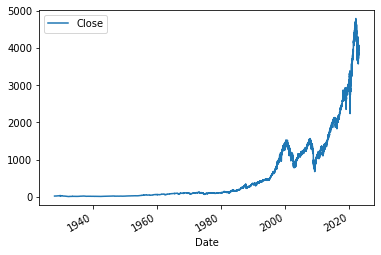

In [ ]:
sp500.plot.line(y="Close", use_index=True)

**DATASET EDITING**

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
ds_rfc = sp500[:]
ds_rfc

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0


**RANDOM FOREST IMPLEMENT**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = ds_rfc.iloc[:-100]
test = ds_rfc.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
score = precision_score(test["Target"], preds)
print("Precision score for RFC: ", score)

Precision score for RFC:  0.3611111111111111


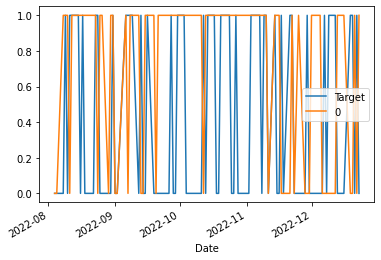

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
#print(test["Target"])
combined.plot()

**IMPROVING THE RESULT**
**-- using BACKTESTING**

In [ ]:
#this is everything we did previously but inside a function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
#backtesting function

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
# calling the backtest function
predictions = backtest(ds_rfc, model, predictors)

In [ ]:
# seeing the count of predictions (how many indications on ups and downs)
predictions["Predictions"].value_counts()

0    3383
1    2428
Name: Predictions, dtype: int64

In [ ]:
# precision score after backtesting
score = precision_score(predictions["Target"], predictions["Predictions"])
print("Precision score for RFC after backtesting: ", score)

Precision score for RFC after backtesting:  0.5284184514003295


In [ ]:
# this tells us the ratio of actual value / predicted value
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534159
0    0.465841
Name: Target, dtype: float64

**IMPROVING THE DATASET**

In [ ]:
sp500_improved = sp500[:]

In [ ]:
horizons = [2,5,60,250,1000] #2,5.. are the number of days before the present day
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500_improved.rolling(horizon).mean() # giving us the mean of last 'horizon' days
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500_improved[ratio_column] = sp500_improved["Close"] / rolling_averages["Close"] # ratio of present close and last horizon close
    
    trend_column = f"Trend_{horizon}"
    sp500_improved[trend_column] = sp500_improved.shift(1).rolling(horizon).sum()["Target"] # ----
    
    new_predictors+= [ratio_column, trend_column]

<ipython-input-17-2bca9f8373ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_improved[ratio_column] = sp500_improved["Close"] / rolling_averages["Close"] # ratio of present close and last horizon close
<ipython-input-17-2bca9f8373ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_improved[trend_column] = sp500_improved.shift(1).rolling(horizon).sum()["Target"] # ----


In [ ]:
sp500_improved = sp500_improved.dropna(subset=sp500_improved.columns[sp500_improved.columns != "Tomorrow"])

In [ ]:
sp500_improved

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1,0.995476,0.0,0.974851,1.0,0.994816,23.0,0.925362,108.0,1.053661,542.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1,1.000518,1.0,0.985832,1.0,0.995128,24.0,0.927108,108.0,1.054372,542.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0,1.007379,2.0,1.006559,2.0,1.008911,25.0,0.941667,108.0,1.069626,543.0


**RANDOM FOREST IMPLEMENTATION -2**

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict_imrpoved(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
#backtesting function

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict_imrpoved(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500_improved, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    3998
1.0     813
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.544377
0    0.455623
Name: Target, dtype: float64